<p><img height="45px" src="https://drive.google.com/uc?id=1aJx1i5ecv6L6R5zUqK_ry6vuDnBDmprd"align="left" hspace="10px" vspace="0px"></p>

<h1>ANALISIS UNIVARIADO Y BIVARIADO DE PROYECTO </h1>
<br>

Por: Deibi Flavio Bastidas Ceron

Presentado a: José Armando Ordoñez Cordoba

# **Introducción**

El análisis univariado es el análisis estadístico más simple, centrado en el estudio de una sola variable a la vez para describir sus características y patrones. Su objetivo es resumir y comprender la distribución de una única variable, utilizando medidas como la media, mediana, moda y desviación estándar, sin examinar relaciones o causas con otras variables. 



World Cycling es una empresa multinacional dedicada a la venta de todo lo relacionado con el deporte del ciclismo. Esta empresa cuenta con varias sucursales distribuidas en distintos países y su stock de artículos de venta se relaciona con bicicletas, indumentaria y accesorios. La empresa enfrenta el desafío de comprender qué factores determinan la rentabilidad de sus ventas, ya que desconoce qué componentes clave (demográficos, geográficos o relacionados con los productos) tienen mayor impacto en el margen de ganancia por venta. La falta de claridad sobre qué elementos impulsan o reducen la rentabilidad limita la toma de decisiones estratégicas en áreas clave como marketing, ventas, compras y finanzas. Esta situación puede conducir a campañas mal dirigidas, precios ineficientes y una oferta de productos poco optimizada lo cual ocasiona una menor competitividad y pérdidas de oportunidades para maximizar beneficios. Identificar estos factores y desarrollar un modelo predictivo que clasifique transacciones como de alta o baja rentabilidad permitiría priorizar acciones en los segmentos más valiosos y optimizar tanto la oferta comercial como los recursos de la empresa.

El dataset suministrado por la empresa, cuenta con gran cantidad de variables y datos que reflejan el historico de ventas de la empresa y que nos pueden servir para cumplir con la pregunta SMART propuesta en este ejercicio.

In [24]:
# Importamos las librerías
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import statistics as stat
from scipy.stats import pearsonr, spearmanr,  kendalltau

In [25]:
# Cargamso el dataset
url = 'bike data.csv'
data = pd.read_csv(url)

In [26]:
# Convertimos el dataset en dataframe
df = pd.DataFrame(data)

In [27]:
# Creamos la variable target y la rellenamos de acuerdo a los valores definidos en la pregunta SMART
# porsentaje de profit >= al 40% es 1 y < al 40% es 0

df['target'] = ((((df['Unit Price']-df['Unit Cost']) / df['Unit Cost']) * 100) >= 40).astype('int')


In [28]:
df['target'].value_counts()

target
1    102668
0     10368
Name: count, dtype: int64

In [29]:
df.head()

,Date,year,Customer ID,Customer Age,Age Group,Customer Gender,Country,State,Product Category,Sub Category,Product,Frame Size,Order Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit,target
0,11/26/2013,2013,11019,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,8,45,120,360,950,590,1
1,11/26/2015,2015,11019,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,8,45,120,360,950,590,1
2,3/23/2014,2014,11039,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,23,45,120,1035,2401,1366,1
3,3/23/2016,2016,11039,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,20,45,120,900,2088,1188,1
4,5/15/2014,2014,11046,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,4,45,120,180,418,238,1


In [30]:
df.describe()

,year,Customer ID,Customer Age,Frame Size,Order Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit,target
count,113036.000000,113036.000000,113036.000000,25982.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,2014.401739,19227.874341,35.919212,47.313063,11.901660,267.296366,452.938427,469.318695,754.370360,285.051665,0.908277
std,1.272510,5307.581302,11.021936,6.860797,9.561857,549.835483,922.071219,884.866118,1309.094674,453.887443,0.288636
min,2011.000000,11000.000000,17.000000,38.000000,1.000000,1.000000,2.000000,1.000000,2.000000,-30.000000,0.000000
25%,2013.000000,14611.000000,28.000000,42.000000,2.000000,2.000000,5.000000,28.000000,63.000000,29.000000,1.000000
50%,2014.000000,18664.000000,35.000000,46.000000,10.000000,9.000000,24.000000,108.000000,223.000000,101.000000,1.000000
75%,2016.000000,23475.000000,43.000000,52.000000,20.000000,42.000000,70.000000,432.000000,800.000000,358.000000,1.000000
max,2016.000000,29483.000000,87.000000,62.000000,32.000000,2171.000000,3578.000000,42978.000000,58074.000000,15096.000000,1.000000


# **ELECCION DE LA VARIABLE PARA REALIZAR EL ANALISIS UNIVARIADO**

Se ha elegido la variable "Unit Cost" por los siguientes motivos:

“Unit Cost” o costo unitario indica el valor de adquisición de cada producto. Este dato es importante en la clasificación de rentabilidad que se quiere realizar, puesto que al generar la variable “target”, la formula que se utiliza para ello recure a la variable en mención. 


In [31]:
# Verificamos si la variable Unit Cost tiene valores nulos
df["Unit Cost"].isnull().sum()

np.int64(0)

In [32]:
# miramos los valores estadisticos de la variable seleccionada. estos valores nos dan una primer vision de la
# distribucion de la variable 
df["Unit Cost"].describe()


count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit Cost, dtype: float64

In [33]:
moda = df['Unit Cost'].mode()
print(moda)

0    2
Name: Unit Cost, dtype: int64


De acuerdo al resumen estadistico de la variable Unit Cost podemos observar lo sigueinte:

- El valor minimo (1) y maximo (2171) informa de una alta dispercion de los datos de la variable. lo que se confirma con una alta desviacion estandar std (549.8).

- La media (267) está muy por encima de la mediana (9): lo que indica una distribución sesgada a la derecha. Los productos con costos muy altos “empujan” el promedio hacia arriba.

- La desviación estándar alta confirma que hay una gran dispersión y presencia de valores extremos (outliers). que de acuerdo a la revision de los datos, estos son valores reales que corresponden a articulos costosos como por ejemplo: Bicicletas. 

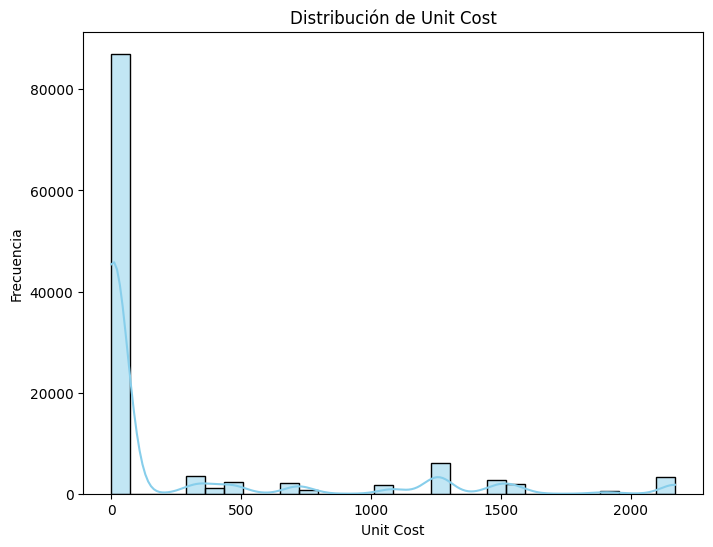

In [34]:
# Histograma de Unit Cost
plt.figure(figsize=(8, 6))
sns.histplot(df["Unit Cost"], bins=30, kde=True, color="skyblue")
plt.title("Distribución de Unit Cost")
plt.xlabel("Unit Cost")
plt.ylabel("Frecuencia")
plt.show()

De acuerdo al histograma se puede afirmar lo sigueinte:

- La variable Unit Cost presenta una distribución sesgada hacia la derecha, lo que indica que la mayoría de los productos que se venden tienen costos unitarios bajos.

- Existen algunos productos con costos mucho más altos y que se venden en menor cantidad, lo que genera una “cola” en la distribución.

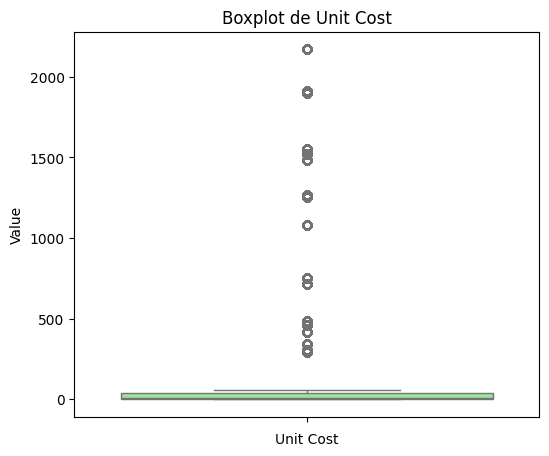

In [35]:
# Boxplot de Unit Cost
plt.figure(figsize=(6, 5))
sns.boxplot(y=df["Unit Cost"], color="lightgreen")
plt.title("Boxplot de Unit Cost")
plt.xlabel("Unit Cost")
plt.ylabel("Value")
plt.show()

- El boxplot muestra que la mediana de Unit Cost está concentrada en un rango bajo. lo que indica que los productos mas vendidos son los de valores bajos

- Se identifican outliers importantes, que corresponden a productos de costo elevado. Estos pueden representar artículos premium o especializados y deben ser tenidos en cuenta en el analsiis.

# **CONCLUSIONES**

Del analisis univariado realizado con la variable "Unit Cost" podemos concluir que:

- La distribucion sergada que presenta la variable predictora, nos informa de la alta rotacion de productos de bajo valor y una baja rotacion de productos de mediano y alto valor.

- Ambos gráficos indican una fuerte asimetría o un sesgo a la derecha.

- la mayoría de los datos de la variable "Unit Cost" son muy bajos, pero existen algunos costos extremadamente altos que, aunque son poco comunes, afectan la distribución de la variable, como se evidencia por el sesgo y la presencia de numerosos valores atípicos.

# **ELECCION DE DOS VARIABLES PARA REALIZAR EL ANALISIS BIVARIADO**

Se ha elegido las variables "Unit Cost" y "target" por los siguientes motivos:

la variable predictora “Unit Cost” es esencial en la construccion de la variable objetivo "target" por ello, estudiaremos su relacion.


C:\Users\deibi\AppData\Local\Temp\ipykernel_10468\1095445986.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="target", y="Unit Cost", palette="Set2")


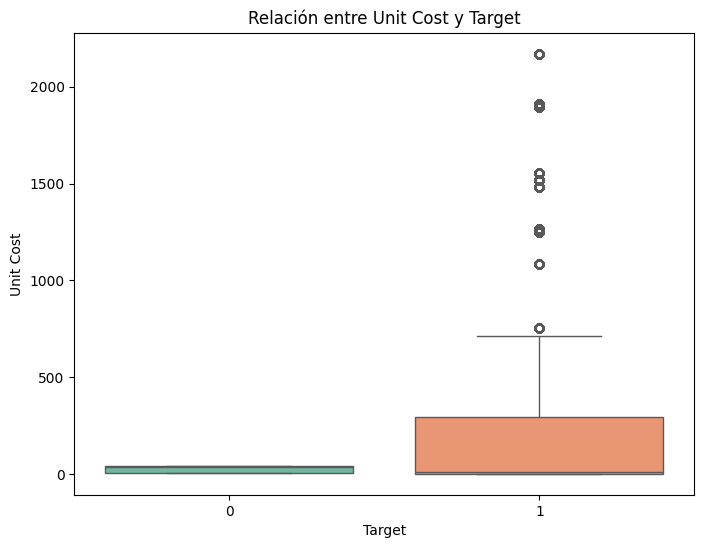

In [41]:
# Relación con la variable target
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="target", y="Unit Cost", palette="Set2")
plt.title("Relación entre Unit Cost y Target")
plt.xlabel("Target")
plt.ylabel("Unit Cost")
plt.show()

Relación de la variable "Unit Cost" con la variable objetivo "target" mediante un grafico Boxplot en donde nos muestra Cómo se distribuyen los valores de Unit Cost según cada clase de la variable objetivo.

- se observa que las clases presentan diferencias claras en sus rangos lo que importante en la clasificacion d ela variable objetivo.

- Existe una clara diferencia entre los dos grupos. Un Costo por unidad bajo está fuertemente asociado con un Objetivo de 0, mientras que un Costo por unidad más alto y con mucha más variabilidad está asociado con un Objetivo de 1.

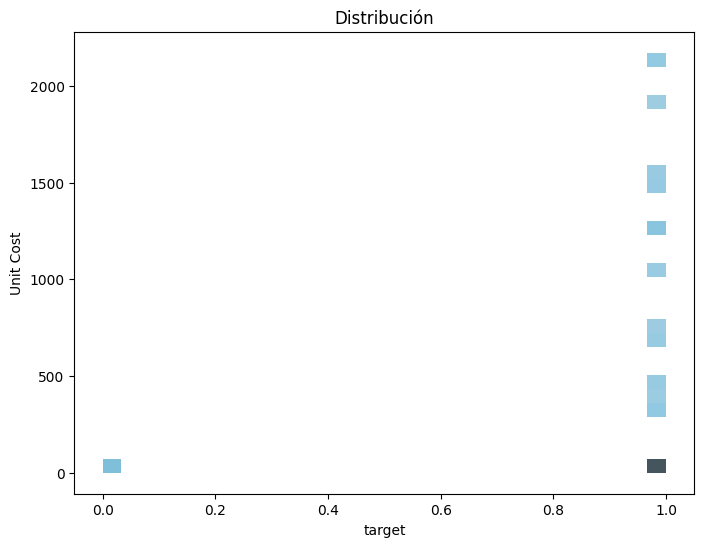

In [42]:
# Histograma de Unit Cost
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="target", y="Unit Cost", bins=30, kde=True, color="skyblue")
plt.title("Distribución")
plt.xlabel("target")
plt.ylabel("Unit Cost")
plt.show()

El gráfico muestra una clara diferencia en la distribución de "Unit Cost" entre las dos categorías. La categoría "target" = 0 está muy concentrada en un valor bajo, mientras que la categoría "target" = 1 muestra una dispersión mucho mayor de valores, con costos que van desde un rango bajo hasta muy alto.

# **CONCLUSIONES**

Del analisis univariado realizado con la variable "Unit Cost" podemos concluir que:

- La variable "Unit Cost" parece ser un factor importante para diferenciar entre los dos estados de la variable Objetivo "target".

- Existe una clara diferencia entre los valores de la variable objetivo. Un "Unit Cost" bajo está fuertemente asociado con un Objetivo de 0, mientras que un "Unit Cost" más alto y con mucha más variabilidad está asociado con un Objetivo de 1.

- La distribucion sergada que presenta la variable predictora, nos informa de la alta rotacion de productos de bajo valor y una baja rotacion de productos de mediano y alto valor.

